# Example of usage of oterogeneity

In [2]:
import oterogeneity as oth
from oterogeneity import utils

import numpy as np

from matplotlib import pyplot as plt

## 1 - Initializing the problem

In [51]:
size, num_categories = 40, 2
coordinate  = np.zeros((2, size, size))
populations = np.zeros((num_categories, size, size))

for i in range(size):
    coordinate[0, i, :] = i
    coordinate[1, :, i] = i

In [58]:
""" Initializing the distribution """
populations[:, :, :] = 0
populations[0, :size//2, :size//2] = 1
populations[0, size//2:, size//2:] = 1
populations[1, size//2:, :size//2] = 1
populations[1, :size//2, size//2:] = 1

#populations[:, size//4:size*3//4, size//4:size*3//4] = .5

A, B = populations[:, size*5//8:size*7//8, size//8:size*3//8].copy(), populations[:, size//8:size*3//8, size//8:size*3//8].copy()
populations[:, size//8:size*3//8, size//8:size*3//8], populations[:, size*5//8:size*7//8, size//8:size*3//8] = A, B

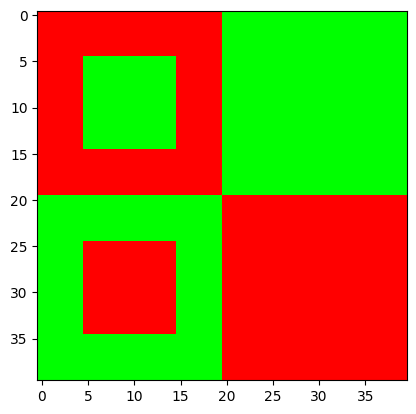

In [59]:
coordinate_flat  = np.resize(coordinate, (2,              size*size))
populations_flat = np.resize(populations, (num_categories, size*size))

population_show = np.resize(np.swapaxes(populations_flat, 0, 1), (size, size, num_categories))
if num_categories > 3:
    population_show = population_show[:, :, :3]
elif num_categories < 3:
    population_show = np.concatenate((population_show, np.zeros((size, size, 3-num_categories))), axis=2)
_ = plt.imshow(population_show)

# 2 - Computing the heterogeneity

In [60]:
unitary_direction_matrix, distance_matrix = utils.compute_unitary_direction_matrix(coordinate_flat)
results = oth.ot_heterogeneity_populations(
	populations_flat, distance_matrix, unitary_direction_matrix,
    #ot_emb_kwargs={'numItermax' : 20}
)
print(results.global_heterogeneity, results.global_heterogeneity_per_category)

5.193552554977028 [5.19355255 5.19355255]


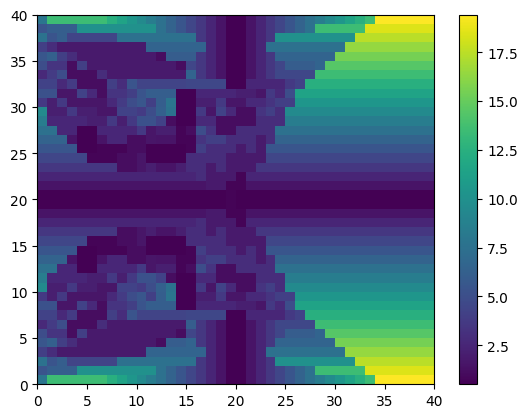

In [55]:
_ = plt.pcolormesh(np.resize(results.local_heterogeneity, (size, size)))
_ = plt.colorbar()

6.655978417428578 [6.65597842 6.65597842]


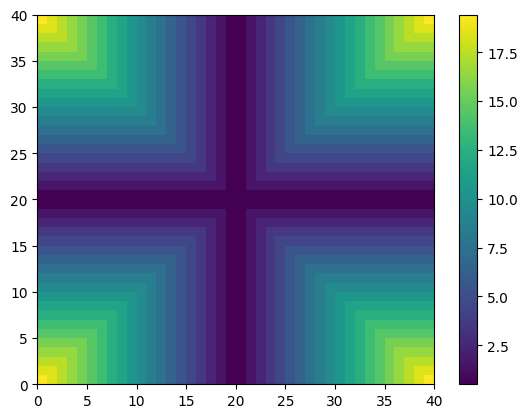

In [61]:
""" Initializing the distribution """
populations[:, :, :] = 0
populations[0, :size//2, :size//2] = 1
populations[0, size//2:, size//2:] = 1
populations[1, size//2:, :size//2] = 1
populations[1, :size//2, size//2:] = 1

#populations[:, size//4:size*3//4, size//4:size*3//4] = .5

#A, B = populations[:, size*5//8:size*7//8, size//8:size*3//8].copy(), populations[:, size//8:size*3//8, size//8:size*3//8].copy()
#populations[:, size//8:size*3//8, size//8:size*3//8], populations[:, size*5//8:size*7//8, size//8:size*3//8] = A, B
populations_flat = np.resize(populations, (num_categories, size*size))

unitary_direction_matrix, distance_matrix = utils.compute_unitary_direction_matrix(coordinate_flat)
results = oth.ot_heterogeneity_populations(
	populations_flat, distance_matrix, unitary_direction_matrix,
    #ot_emb_kwargs={'numItermax' : 20}
)
print(results.global_heterogeneity, results.global_heterogeneity_per_category)

_ = plt.pcolormesh(np.resize(results.local_heterogeneity, (size, size)))
_ = plt.colorbar()